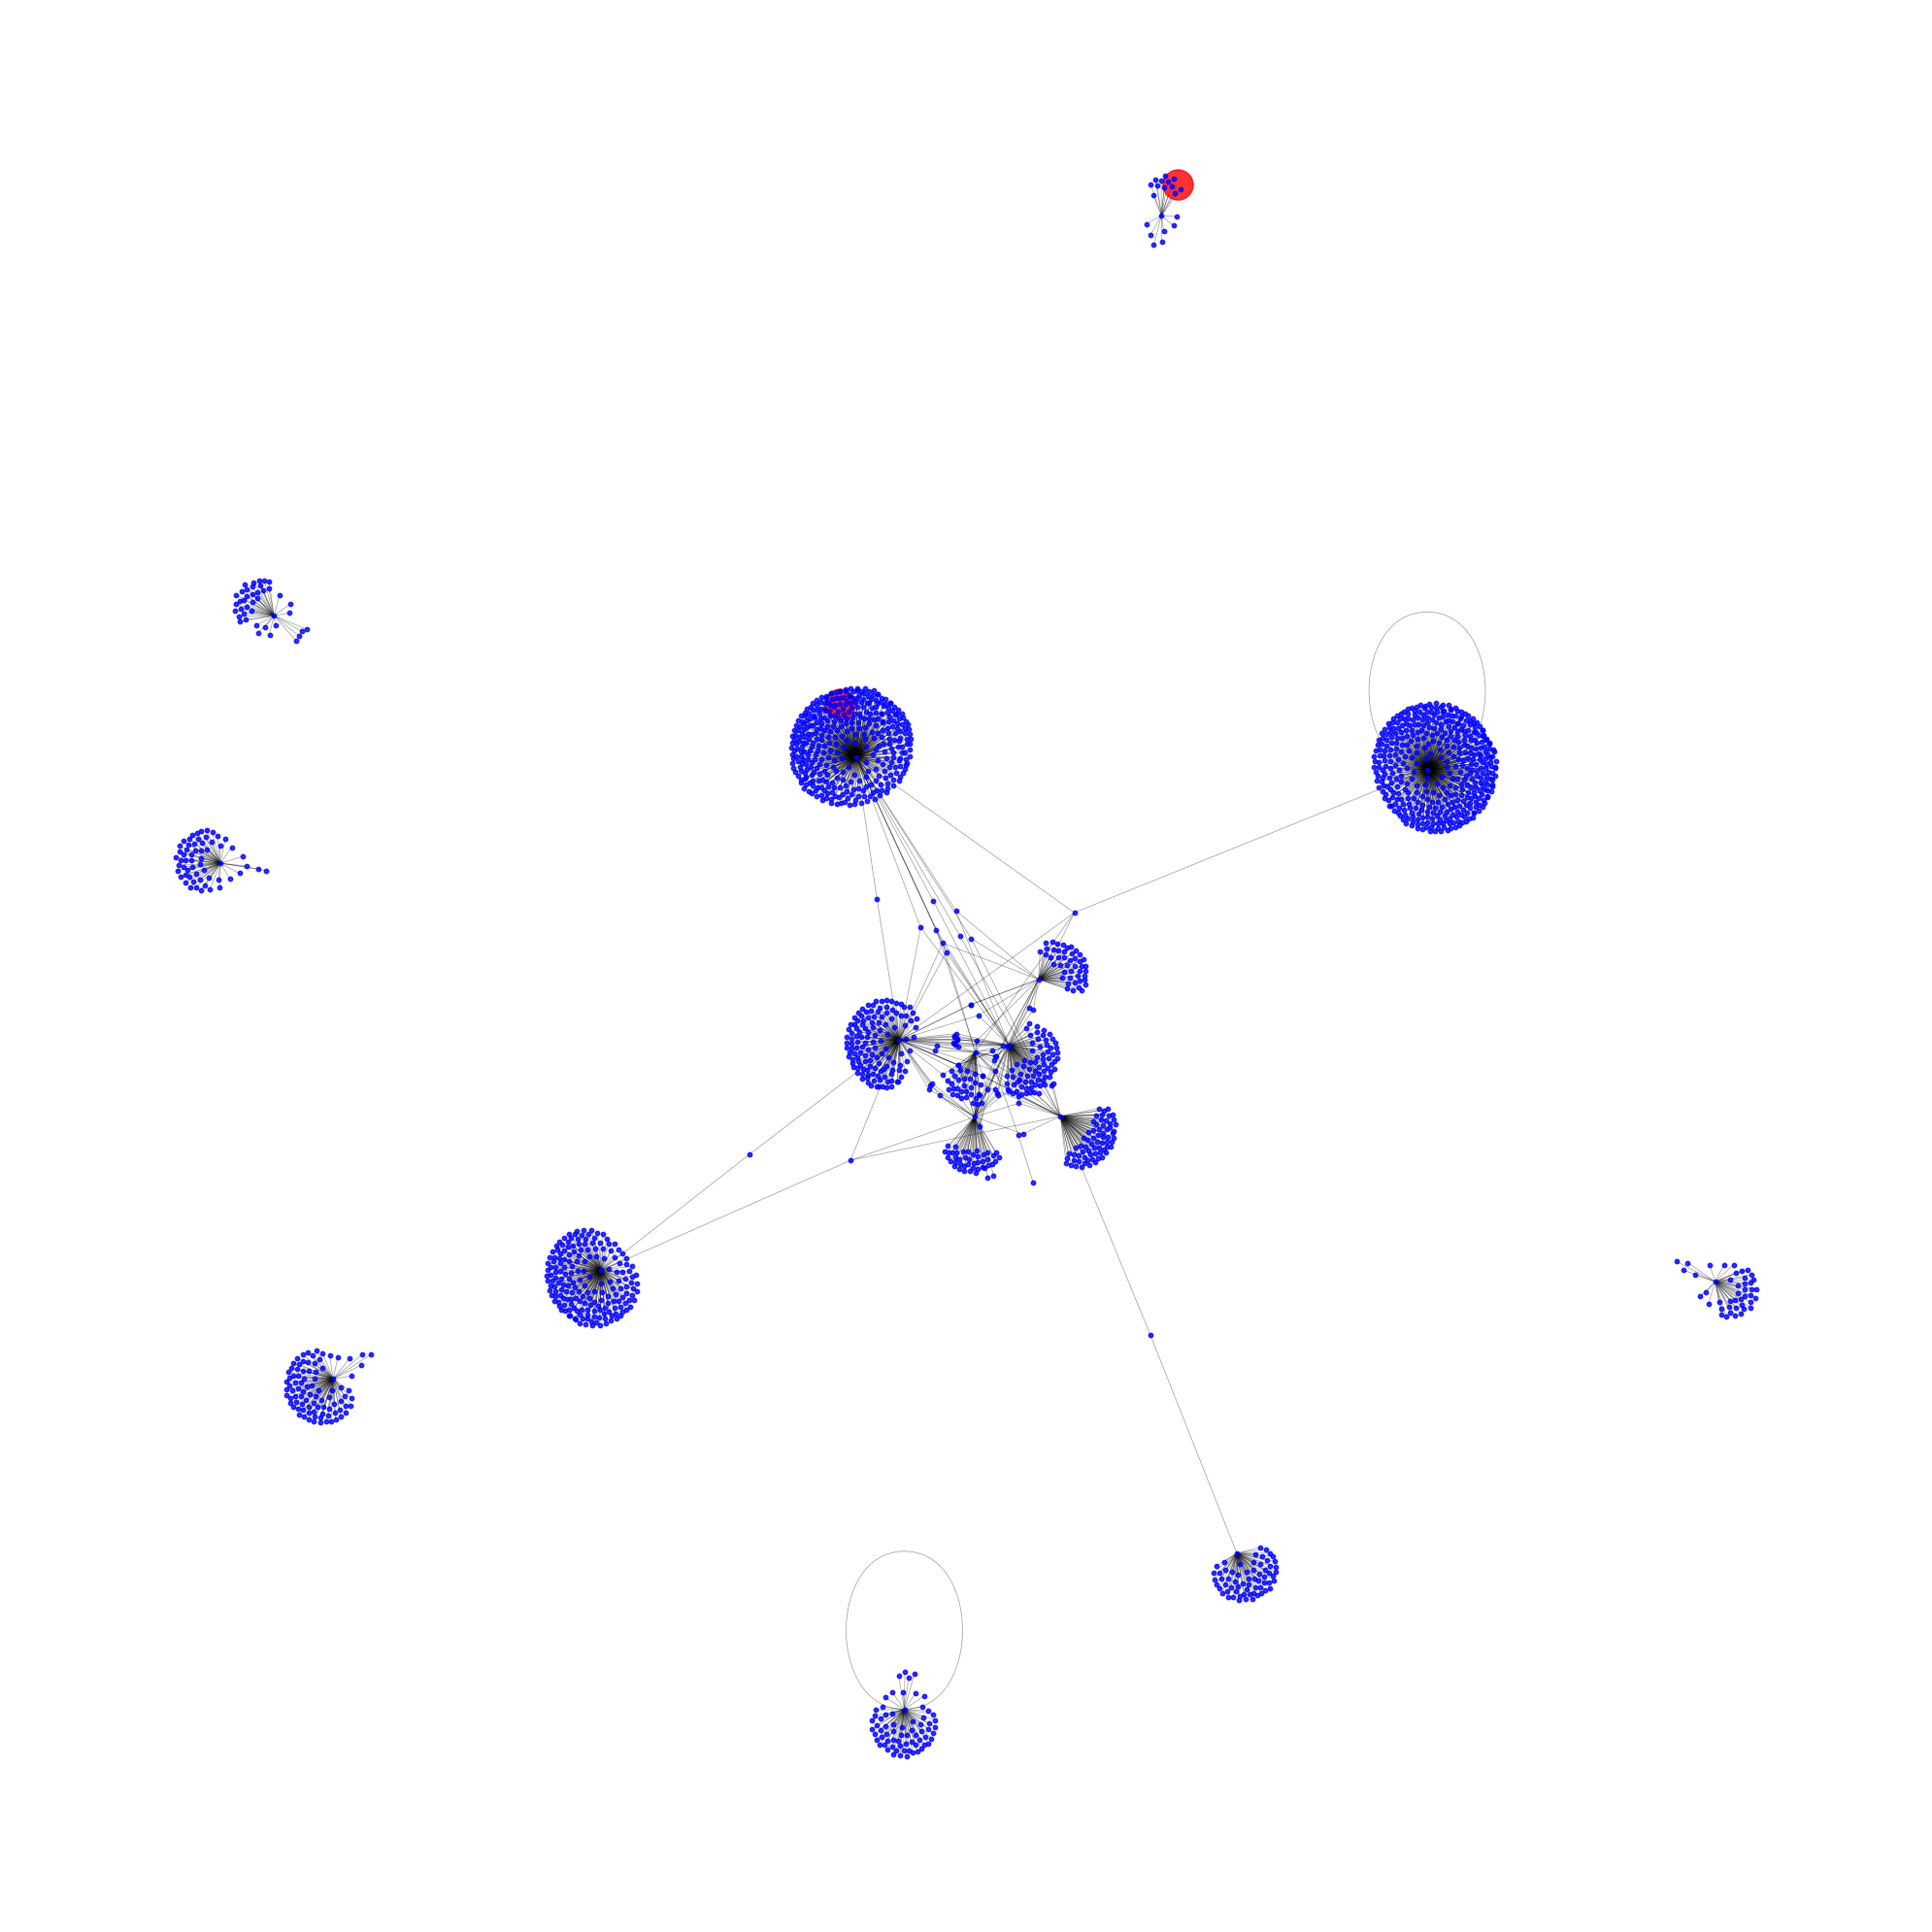

In [8]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            for uploader in uploaders:
                graph.add_edge(user_id, uploader)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=500, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='b', node_size=10, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.4)  # エッジの透明度を上げる
    # nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)

draw_bipartite_graph(bipartite_graph)

In [6]:
import csv
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# 二部グラフのデータ構造
class BipartiteGraph:
    def __init__(self):
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

# CSVファイルを読み込んで二部グラフを構築
def build_bipartite_graph(csv_file):
    graph = BipartiteGraph()
    single_uploaders = defaultdict(list)
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            uploaders = eval(row['unique_uploader_name'])  # 文字列をリストに変換
            
            if len(uploaders) == 1:
                single_uploaders[uploaders[0]].append(user_id)
            else:
                for uploader in uploaders:
                    graph.add_edge(user_id, uploader)
    
    for uploader, users in single_uploaders.items():
        group_node = f"Group_{uploader}"
        for user in users:
            graph.add_edge(user, group_node)
    
    return graph

# 二部グラフを描画
def draw_bipartite_graph(graph):
    G = nx.Graph(graph.adj_list)
    
    # 二部グラフのノードを分割
    user_nodes = [n for n in G.nodes() if n.startswith('wZ')]
    uploader_nodes = [n for n in G.nodes() if not n.startswith('wZ') and not n.startswith('Group_')]
    group_nodes = [n for n in G.nodes() if n.startswith('Group_')]
    
    # ノードの位置を設定（ランダムレイアウト）
    pos = nx.spring_layout(G, seed=42)
    
    # 描画
    plt.figure(figsize=(20, 20))  # 図のサイズを大きくする
    nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='r', node_size=1000, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=uploader_nodes, node_color='g', node_size=10, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=group_nodes, node_color='orange', node_size=200, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)  # エッジの透明度を上げる
    #nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = '/work/unique_uploaderHPV.csv'
bipartite_graph = build_bipartite_graph(csv_file)
draw_bipartite_graph(bipartite_graph)

In [15]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = {}
pos.update((n, (1, i)) for i, n in enumerate(user_ids))
pos.update((n, (2, i)) for i, n in enumerate(uploaders))
nx.draw_networkx(G, pos, node_color=color_map, with_labels=False, node_size=100)

plt.axis('off')
plt.show()

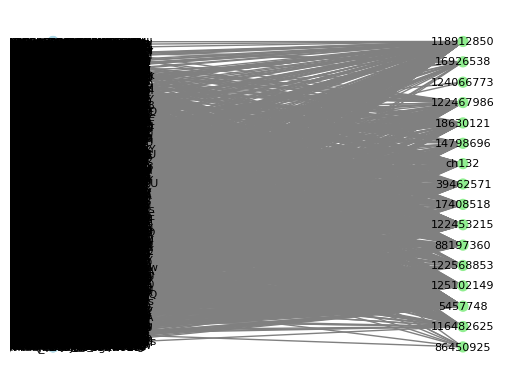

In [20]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

user_ids = list(set([pair[0] for pair in data]))
uploaders = list(set([pair[1] for pair in data]))

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
    else:
        color_map.append('lightgreen')

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()

In [46]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# CSVファイルからデータを読み込む
with open('/work/unique_uploaderHPV.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [(row['user_id'], uploader) for row in reader for uploader in eval(row['unique_uploader_name'])]

# unique_uploader_nameが複数あるuser_idを抽出
user_id_counts = {}
for user_id, _ in data:
    user_id_counts[user_id] = user_id_counts.get(user_id, 0) + 1



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count == 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

# アップローダーごとのuser_idの数を集計
uploader_user_counts = {}
for user_id, uploader in filtered_data:
    if uploader not in uploader_user_counts:
        uploader_user_counts[uploader] = 1
    else:
        uploader_user_counts[uploader] += 1

# 結果の表示
print(uploader_user_counts)



multiple_uploader_user_ids = [user_id for user_id, count in user_id_counts.items() if count > 1]

# 抽出したuser_idに関連するデータのみを取得
filtered_data = [(user_id, uploader) for user_id, uploader in data if user_id in multiple_uploader_user_ids]

user_ids = list(set([pair[0] for pair in filtered_data]))
uploaders = list(set([pair[1] for pair in filtered_data]))


# uploadersリストにuploader_user_countsを組み込む
uploaders_with_counts = []
for uploader in uploaders:
    if uploader in uploader_user_counts:
        count = uploader_user_counts[uploader]
        uploaders_with_counts.append((uploader, count))

# 結果の表示
print(uploaders_with_counts)

# グラフの作成
G = nx.Graph()
G.add_nodes_from(user_ids, bipartite=0)
G.add_nodes_from(uploaders, bipartite=1)
G.add_edges_from(filtered_data)

# 色分けの設定
color_map = []
for node in G:
    if node in user_ids:
        color_map.append('lightblue')
        print(node)
    else:
        color_map.append('lightgreen')
        print(node)

# グラフの描画
pos = nx.bipartite_layout(G, user_ids)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)  # ノードのラベルを非表示にする
plt.axis('off')
plt.show()


{'16926538': 20, '5457748': 374, '88197360': 64, '116482625': 58, '17408518': 23, '122467986': 45, '86450925': 2, '122453215': 184, 'ch132': 89, '124066773': 1, '14798696': 43, '15378227': 69, '122568853': 40, '90869956': 421, '118912850': 129, '125102149': 71, '18630121': 42, '39462571': 67}
[('88197360', 64), ('18630121', 42), ('125102149', 71), ('5457748', 374), ('90869956', 421), ('122467986', 45), ('124066773', 1), ('86450925', 2), ('118912850', 129), ('122453215', 184), ('17408518', 23), ('39462571', 67)]
G0-uvGwLnJQy54MbiIMtiekZOzY
VvzO3h4s0KVjcamN95KJCQkL3sE
U4htUNHf9gzdvXJnVYNLJnIjhSU
b9MFx88IKmMyOyBrtU5rH8OtvuI
lyAw5ppedOeFXmVXt9rWOYidPkM
yD-P5wYxfgDJZs45eIPi7chcegM
5cD4nR8SjGSnBLkZp7QYTiMVryY
ywOOzdVvGhpAGG8S8iN3eBgzzno
p2--Wdt5z6ksD8GHXmtTmUqHhK4
bIvIRXzHbARfeZ8PWcDgwXfEFZo
r2Isz5LWrDAjB5vXuJ8eA7S2E8s
7QjnoZoJe5Xubd0OKRKkq7UWjUI
z6azAFaZVD2_WcvH03ZOyCSxpio
uR2418TAZ5Ns7q2VLQl2lM7yjJY
ubPop4-84OzHK4XFH1uGulXJoAM
tWvmdlirFt_VjlRKJDIrUI021hs
iQIgpNUBty2lBiDdjjJfbneN0tc
5DwV3jr

In [47]:
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_uploaders_with_counts = []
for uploader, count in uploaders_with_counts:
    # uploadersリスト内のアップローダーの数を取得
    uploaders_count = uploaders.count(uploader)
    # 掛け合わせた値を計算
    weighted_count = count * uploaders_count
    # 結果をリストに保存
    weighted_uploaders_with_counts.append((uploader, weighted_count))

# 結果の表示
for entry in weighted_uploaders_with_counts:
    print(f"uploader: {entry[0]}, weighted_count: {entry[1]}")

uploader: 88197360, weighted_count: 64
uploader: 18630121, weighted_count: 42
uploader: 125102149, weighted_count: 71
uploader: 5457748, weighted_count: 374
uploader: 90869956, weighted_count: 421
uploader: 122467986, weighted_count: 45
uploader: 124066773, weighted_count: 1
uploader: 86450925, weighted_count: 2
uploader: 118912850, weighted_count: 129
uploader: 122453215, weighted_count: 184
uploader: 17408518, weighted_count: 23
uploader: 39462571, weighted_count: 67


In [48]:
import pandas as pd

# グラフGから左ノードと右ノードのリストを取得
left_nodes = [node for node in G if node in user_ids]
right_nodes = [node for node in G if node in uploaders]

# 接続の有無を確認し、表に変換
connection_matrix = pd.DataFrame(index=left_nodes, columns=right_nodes)
for left_node in left_nodes:
    for right_node in right_nodes:
        if G.has_edge(left_node, right_node):
            connection_matrix.at[left_node, right_node] = 1
        else:
            connection_matrix.at[left_node, right_node] = 0

connection_matrix

88197360 18630121 125102149 5457748 90869956  \
G0-uvGwLnJQy54MbiIMtiekZOzY        0        0         0       0        0   
VvzO3h4s0KVjcamN95KJCQkL3sE        0        0         1       0        0   
U4htUNHf9gzdvXJnVYNLJnIjhSU        0        0         1       1        0   
b9MFx88IKmMyOyBrtU5rH8OtvuI        0        0         1       0        0   
lyAw5ppedOeFXmVXt9rWOYidPkM        0        1         1       0        0   
...                              ...      ...       ...     ...      ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA        0        1         1       0        0   
7DKMQSCD-Shuqpcakv-D9uVVGV4        0        1         1       0        0   
W6lopeVgjHSn9ixlDL42RDLCg_Y        0        0         1       0        0   
zXwzmJk_bU16wxl4OBTSlnqeVaw        1        0         0       0        0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM        0        1         0       0        0   

                            122467986 124066773 86450925 118912850 122453215  \
G0-uvGwLnJQy54MbiIMtiekZOzY         0         0        1         0         0   
VvzO3h4s0KVjcamN95KJCQkL3sE         0         0        0         1         0   
U4htUNHf9gzdvXJnVYNLJnIjhSU         0         0        0         0         0   
b9MFx88IKmMyOyBrtU5rH8OtvuI         0         0        0         0         0   
lyAw5ppedOeFXmVXt9rWOYidPkM         0         0        0         0         0   
...                               ...       ...      ...       ...       ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA         0         0        0         0         0   
7DKMQSCD-Shuqpcakv-D9uVVGV4         1         1        1         1         0   
W6lopeVgjHSn9ixlDL42RDLCg_Y         0         0        0         1         0   
zXwzmJk_bU16wxl4OBTSlnqeVaw         0         0        0         0         0   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM         0         0        1         1         0   

                            17408518 39462571  
G0-uvGwLnJQy54MbiIMtiekZOzY        1        0  
VvzO3h4s0KVjcamN95KJCQkL3sE        0        0  
U4htUNHf9gzdvXJnVYNLJnIjhSU        1        0  
b9MFx88IKmMyOyBrtU5rH8OtvuI        1        0  
lyAw5ppedOeFXmVXt9rWOYidPkM        0        0  
...                              ...      ...  
6WVsIvLRUkkvZwgd3qcsjnFUikA        1        1  
7DKMQSCD-Shuqpcakv-D9uVVGV4        1        1  
W6lopeVgjHSn9ixlDL42RDLCg_Y        0        0  
zXwzmJk_bU16wxl4OBTSlnqeVaw        0        1  
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM        0        0  

[64 rows x 12 columns]

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

def calculate_cosine_similarity(matrix):
    return pd.DataFrame(cosine_similarity(matrix), index=matrix.index, columns=matrix.index)

def calculate_tfidf_cosine_similarity(matrix):
    tfidf = TfidfTransformer()
    tfidf_matrix = tfidf.fit_transform(matrix)
    return pd.DataFrame(cosine_similarity(tfidf_matrix), index=matrix.index, columns=matrix.index)

In [50]:
cosine_sim_uploaders = calculate_cosine_similarity(connection_matrix.T)
print("uploadersのコサイン類似度:")
cosine_sim_uploaders

uploadersのコサイン類似度:


88197360  18630121  125102149   5457748  90869956  122467986  \
88197360   1.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
18630121   0.000000  1.000000   0.335013  0.060858  0.192450   0.266880   
125102149  0.000000  0.335013   1.000000  0.275241  0.000000   0.337963   
5457748    0.000000  0.060858   0.275241  1.000000  0.316228   0.263117   
90869956   0.000000  0.192450   0.000000  0.316228  1.000000   0.000000   
122467986  0.000000  0.266880   0.337963  0.263117  0.000000   1.000000   
124066773  0.000000  0.192450   0.174078  0.000000  0.000000   0.277350   
86450925   0.000000  0.392837   0.142134  0.000000  0.000000   0.113228   
118912850  0.000000  0.429064   0.477665  0.271163  0.171499   0.332956   
122453215  0.000000  0.136083   0.000000  0.000000  0.000000   0.000000   
17408518   0.000000  0.510688   0.390868  0.193649  0.204124   0.283069   
39462571   0.242536  0.326732   0.295540  0.230089  0.000000   0.201802   

           124066773  86450925  118912850  122453215  17408518  39462571  
88197360    0.000000  0.000000   0.000000   0.000000  0.000000  0.242536  
18630121    0.192450  0.392837   0.429064   0.136083  0.510688  0.326732  
125102149   0.174078  0.142134   0.477665   0.000000  0.390868  0.295540  
5457748     0.000000  0.000000   0.271163   0.000000  0.193649  0.230089  
90869956    0.000000  0.000000   0.171499   0.000000  0.204124  0.000000  
122467986   0.277350  0.113228   0.332956   0.000000  0.283069  0.201802  
124066773   1.000000  0.408248   0.171499   0.000000  0.204124  0.242536  
86450925    0.408248  1.000000   0.140028   0.000000  0.416667  0.099015  
118912850   0.171499  0.140028   1.000000   0.242536  0.315063  0.291162  
122453215   0.000000  0.000000   0.242536   1.000000  0.000000  0.171499  
17408518    0.204124  0.416667   0.315063   0.000000  1.000000  0.247537  
39462571    0.242536  0.099015   0.291162   0.171499  0.247537  1.000000

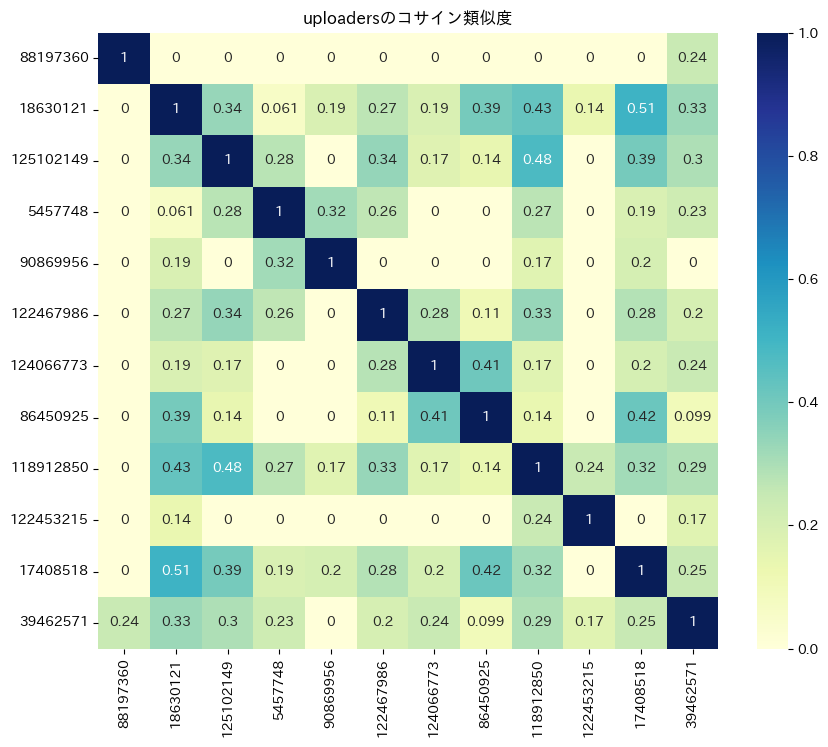

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのコサイン類似度")
plt.show()

In [52]:
tfidf_cosine_sim_uploaders = calculate_tfidf_cosine_similarity(connection_matrix.T)
print("uploadersのtf-idfコサイン類似度:")
tfidf_cosine_sim_uploaders

uploadersのtf-idfコサイン類似度:


88197360  18630121  125102149   5457748  90869956  122467986  \
88197360   1.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
18630121   0.000000  1.000000   0.294207  0.039306  0.154009   0.213150   
125102149  0.000000  0.294207   1.000000  0.256371  0.000000   0.285022   
5457748    0.000000  0.039306   0.256371  1.000000  0.255222   0.233158   
90869956   0.000000  0.154009   0.000000  0.255222  1.000000   0.000000   
122467986  0.000000  0.213150   0.285022  0.233158  0.000000   1.000000   
124066773  0.000000  0.118792   0.103813  0.000000  0.000000   0.175320   
86450925   0.000000  0.339439   0.084741  0.000000  0.000000   0.047011   
118912850  0.000000  0.374144   0.456952  0.236731  0.133386   0.273580   
122453215  0.000000  0.105522   0.000000  0.000000  0.000000   0.000000   
17408518   0.000000  0.453761   0.336224  0.147276  0.164420   0.192631   
39462571   0.268246  0.261819   0.247452  0.243836  0.000000   0.128800   

           124066773  86450925  118912850  122453215  17408518  39462571  
88197360    0.000000  0.000000   0.000000   0.000000  0.000000  0.268246  
18630121    0.118792  0.339439   0.374144   0.105522  0.453761  0.261819  
125102149   0.103813  0.084741   0.456952   0.000000  0.336224  0.247452  
5457748     0.000000  0.000000   0.236731   0.000000  0.147276  0.243836  
90869956    0.000000  0.000000   0.133386   0.000000  0.164420  0.000000  
122467986   0.175320  0.047011   0.273580   0.000000  0.192631  0.128800  
124066773   1.000000  0.268145   0.102886   0.000000  0.126823  0.148758  
86450925    0.268145  1.000000   0.097589   0.000000  0.386677  0.039889  
118912850   0.102886  0.097589   1.000000   0.236768  0.252941  0.245240  
122453215   0.000000  0.000000   0.236768   1.000000  0.000000  0.132140  
17408518    0.126823  0.386677   0.252941   0.000000  1.000000  0.193082  
39462571    0.148758  0.039889   0.245240   0.132140  0.193082  1.000000

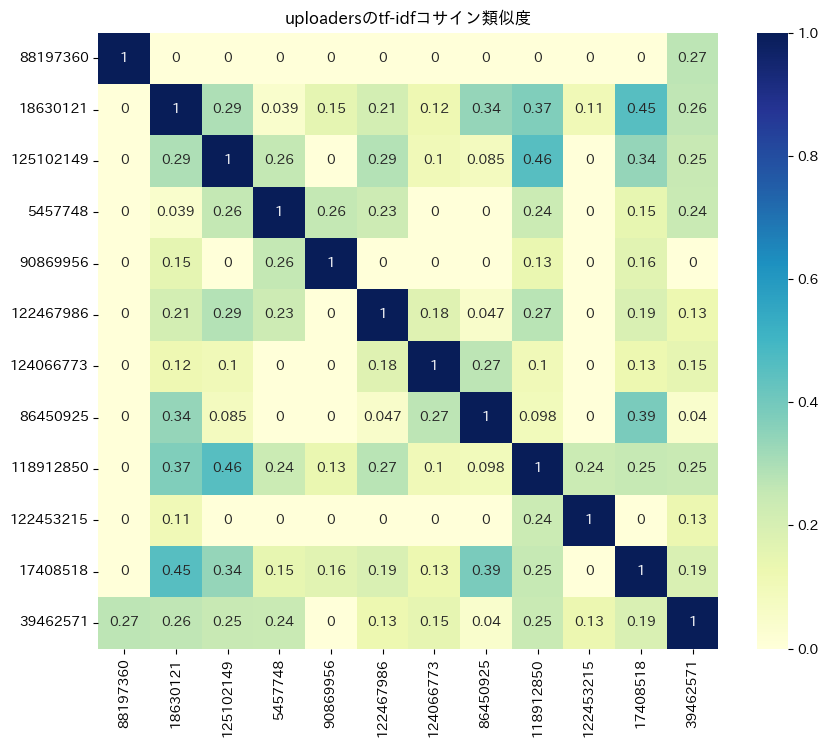

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのtf-idfコサイン類似度")
plt.show()

In [54]:
cosine_sim_users = calculate_cosine_similarity(connection_matrix)
print("user_idsのコサイン類似度:")
cosine_sim_users

user_idsのコサイン類似度:


G0-uvGwLnJQy54MbiIMtiekZOzY  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     1.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.353553   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             VvzO3h4s0KVjcamN95KJCQkL3sE  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     1.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.353553   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     1.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             U4htUNHf9gzdvXJnVYNLJnIjhSU  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.408248   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.408248   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     1.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.816497   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.408248   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.577350   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.408248   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.408248   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             b9MFx88IKmMyOyBrtU5rH8OtvuI  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.500000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.500000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.816497   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     1.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.707107   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.500000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             lyAw5ppedOeFXmVXt9rWOYidPkM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.500000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     1.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.707107   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.500000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             yD-P5wYxfgDJZs45eIPi7chcegM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVs

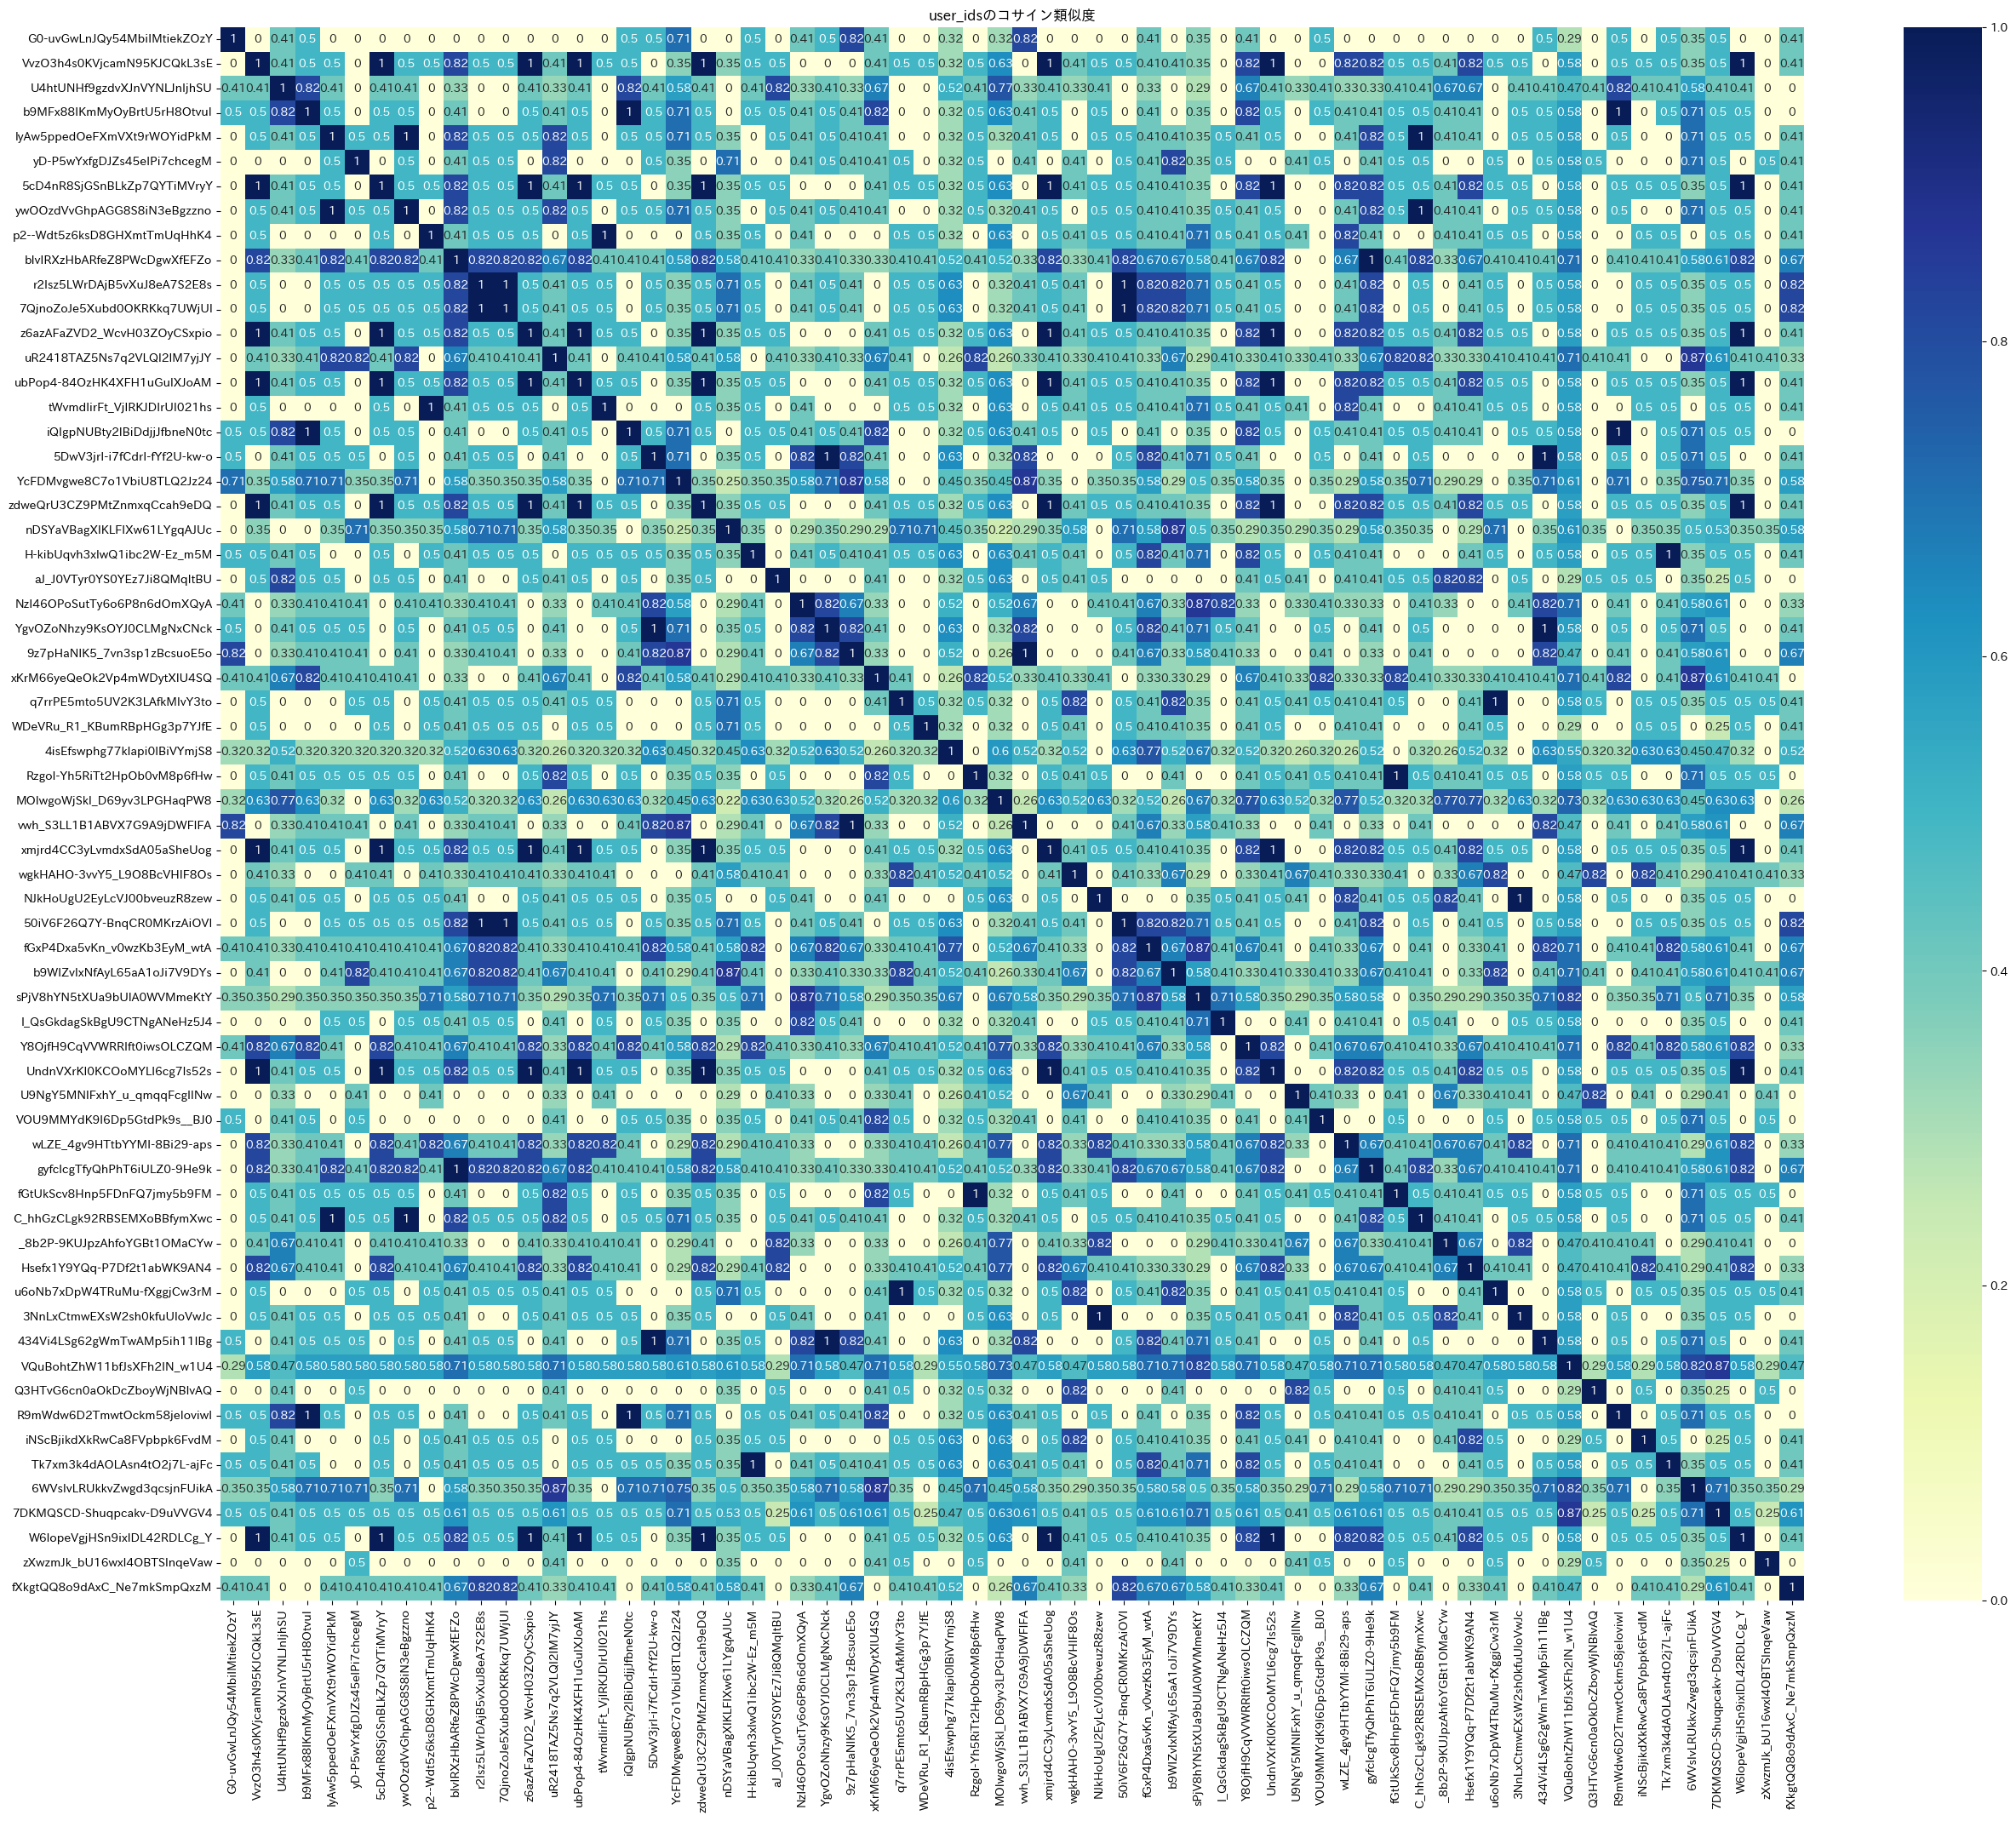

In [55]:
plt.figure(figsize=(30, 24))
sns.heatmap(cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのコサイン類似度")
plt.show()

In [56]:
tfidf_cosine_sim_users = calculate_tfidf_cosine_similarity(connection_matrix)
print("user_idsのtf-idfコサイン類似度:")
tfidf_cosine_sim_users

user_idsのtf-idfコサイン類似度:


G0-uvGwLnJQy54MbiIMtiekZOzY  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     1.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.268390   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.396158   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.260283   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.510332   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.681095   

                             VvzO3h4s0KVjcamN95KJCQkL3sE  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     1.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.311442   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.459705   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.475621   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.302035   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.312356   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     1.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.279853   

                             U4htUNHf9gzdvXJnVYNLJnIjhSU  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.268390   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.311442   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     1.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.677483   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.291092   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.445119   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.234249   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.311442   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             b9MFx88IKmMyOyBrtU5rH8OtvuI  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.396158   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.459705   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.677483   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     1.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.429667   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.657019   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.345764   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.459705   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             lyAw5ppedOeFXmVXt9rWOYidPkM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.475621   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.291092   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.429667   
lyAw5ppedOeFXmVXt9rWOYidPkM                     1.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.635032   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.334193   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.475621   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.338636   

                             yD-P5wYxfgDJZs45eIPi7chcegM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.467894   
...                                                  ...   
6WVs

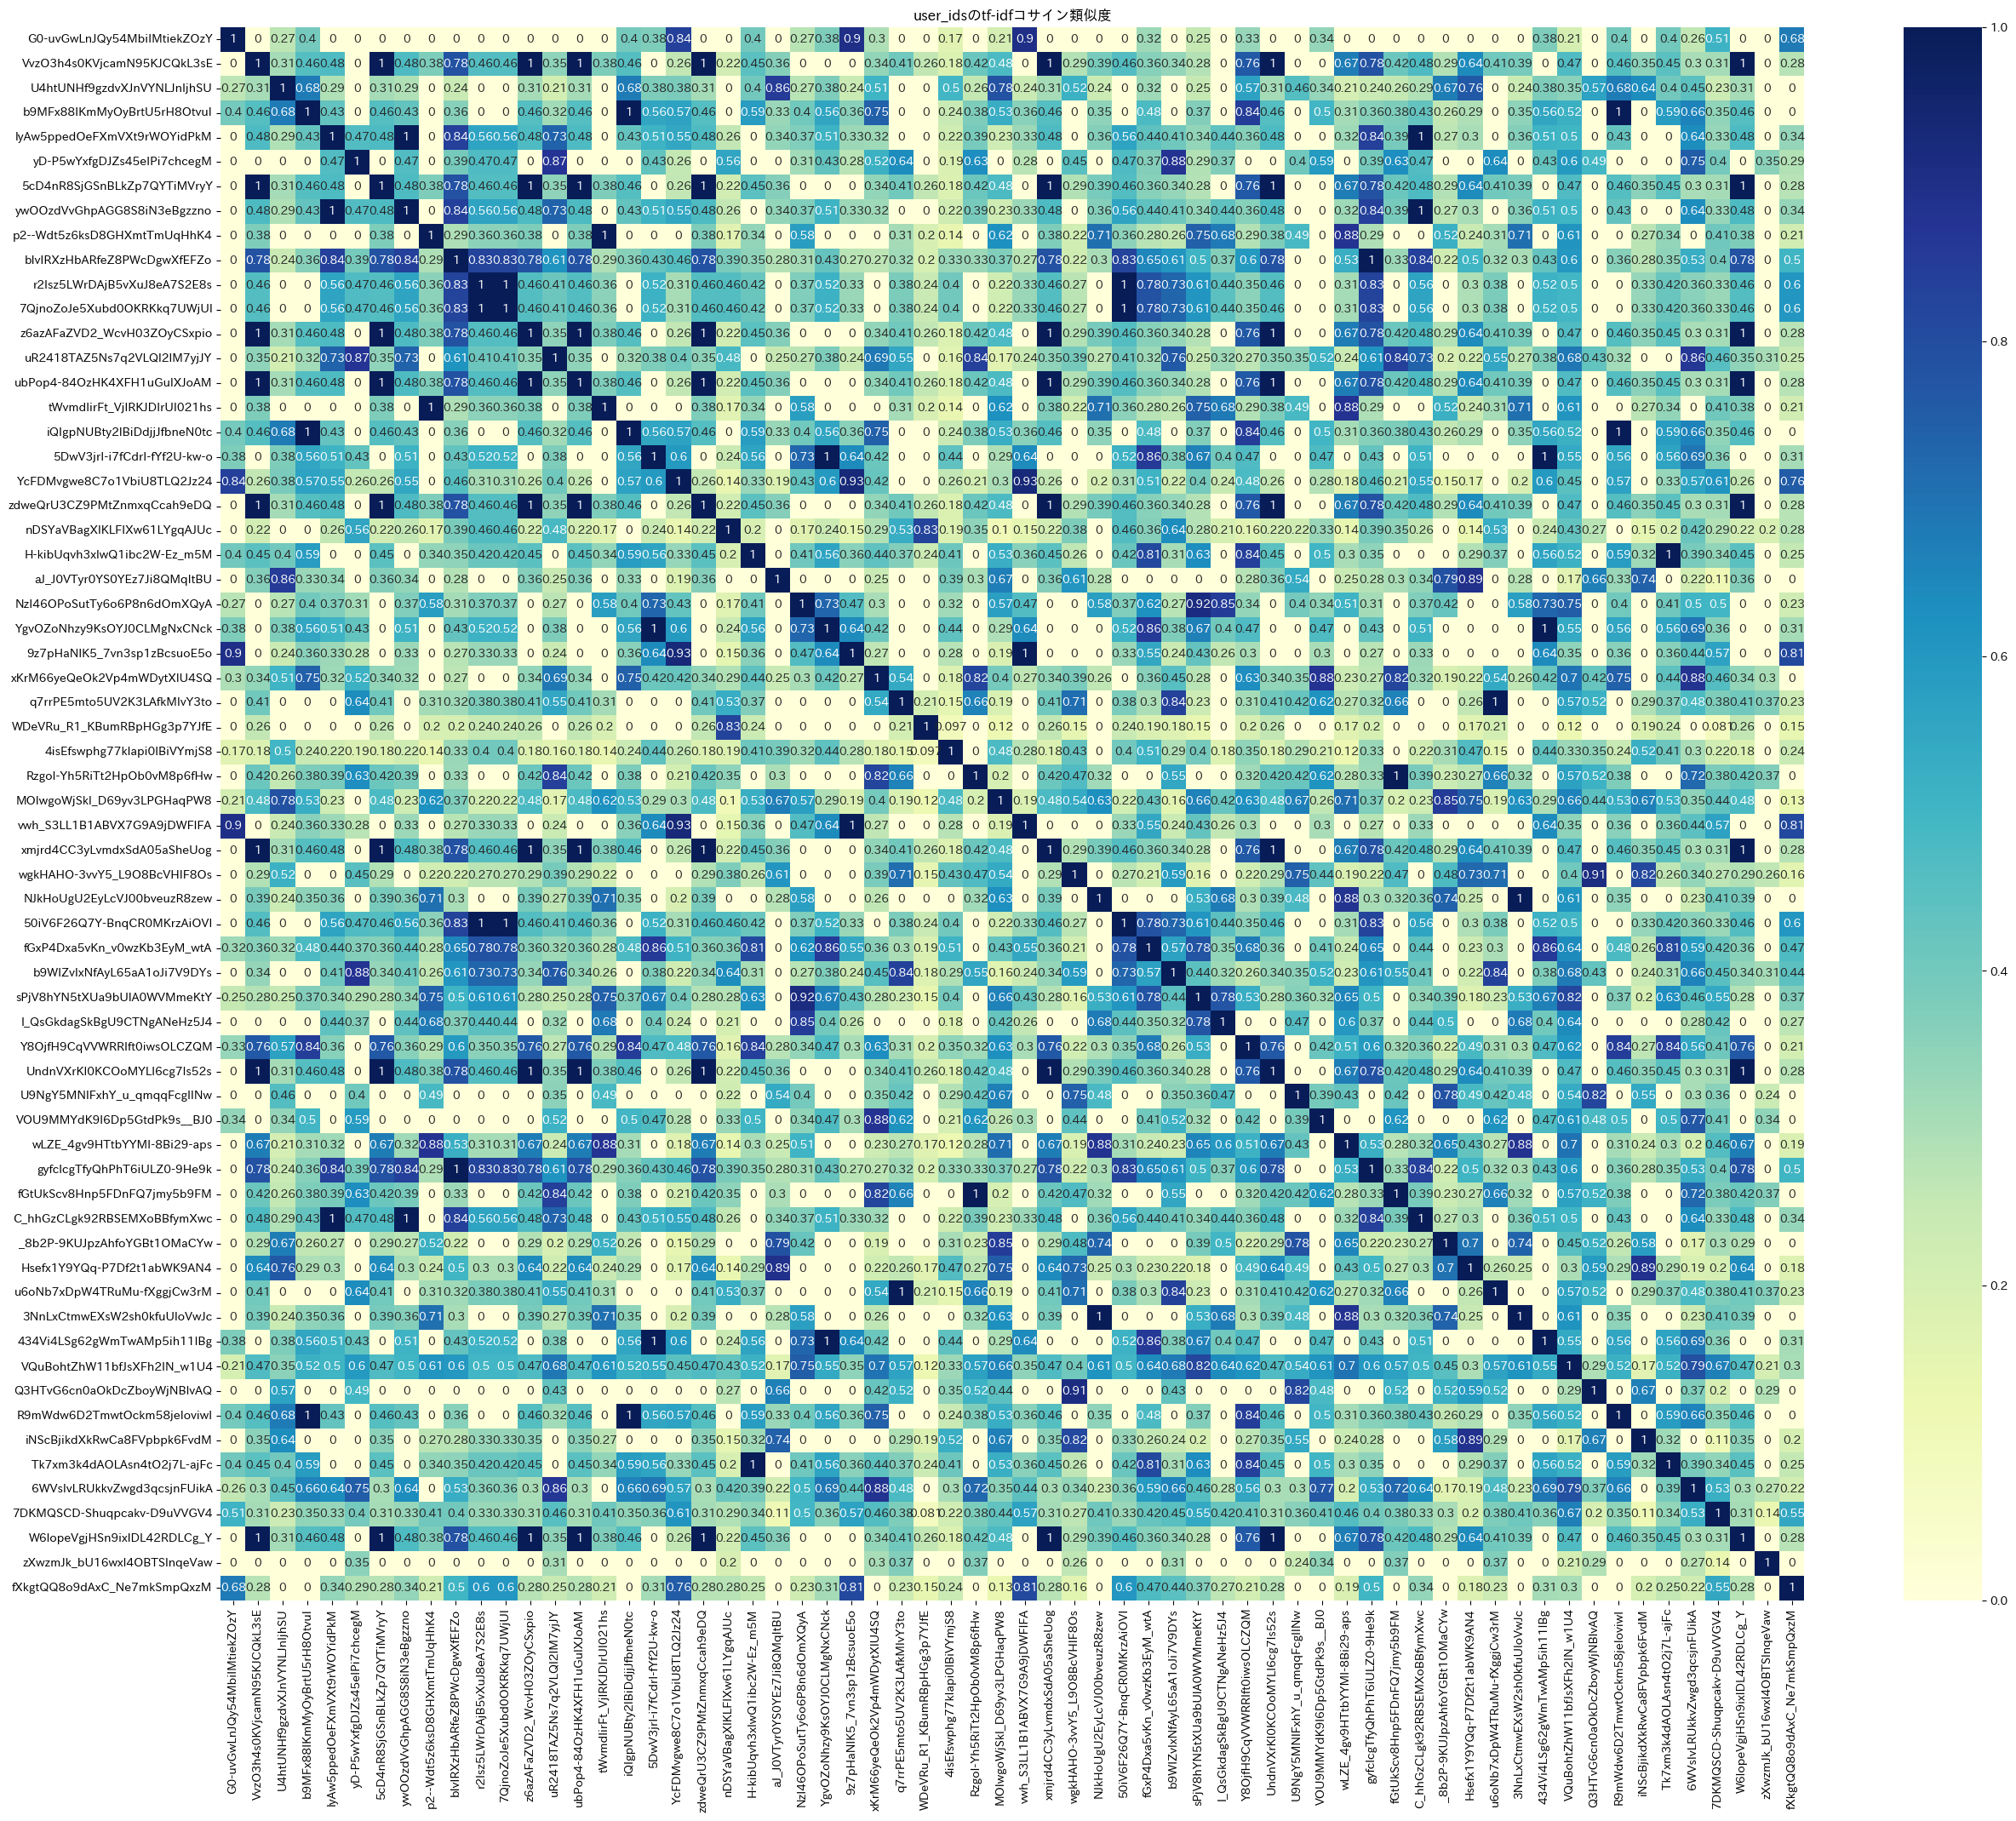

In [67]:
plt.figure(figsize=(30, 24))
sns.heatmap(tfidf_cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのtf-idfコサイン類似度")
plt.show()

In [68]:
# 重み付けを施すためのコード
# uploaders_with_countsの個数をそれぞれの行にかけ合わせた表を作成
weighted_connection_matrix = connection_matrix.copy()
for uploader, count in uploaders_with_counts:
    uploaders_count = uploaders.count(uploader)
    weighted_count = count * uploaders_count
    # 重み付けを施す
    for left_node in left_nodes:
        for right_node in right_nodes:
            if G.has_edge(left_node, right_node) and right_node == uploader:
                weighted_connection_matrix.at[left_node, right_node] *= weighted_count

# 重み付けを施した表の表示
weighted_connection_matrix.T

G0-uvGwLnJQy54MbiIMtiekZOzY VvzO3h4s0KVjcamN95KJCQkL3sE  \
88197360                            0                           0   
18630121                            0                           0   
125102149                           0                          71   
5457748                             0                           0   
90869956                            0                           0   
122467986                           0                           0   
124066773                           0                           0   
86450925                            2                           0   
118912850                           0                         129   
122453215                           0                           0   
17408518                           23                           0   
39462571                            0                           0   

          U4htUNHf9gzdvXJnVYNLJnIjhSU b9MFx88IKmMyOyBrtU5rH8OtvuI  \
88197360                            0                           0   
18630121                            0                           0   
125102149                          71                          71   
5457748                           374                           0   
90869956                            0                           0   
122467986                           0                           0   
124066773                           0                           0   
86450925                            0                           0   
118912850                           0                           0   
122453215                           0                           0   
17408518                           23                          23   
39462571                            0                           0   

          lyAw5ppedOeFXmVXt9rWOYidPkM yD-P5wYxfgDJZs45eIPi7chcegM  \
88197360                            0                           0   
18630121                           42                          42   
125102149                          71                           0   
5457748                             0                           0   
90869956                            0                           0   
122467986                           0                           0   
124066773                           0                           0   
86450925                            0                           0   
118912850                           0                           0   
122453215                           0                           0   
17408518                            0                           0   
39462571                            0                          67   

          5cD4nR8SjGSnBLkZp7QYTiMVryY ywOOzdVvGhpAGG8S8iN3eBgzzno  \
88197360                            0                           0   
18630121                            0                          42   
125102149                          71                          71   
5457748                             0                           0   
90869956                            0                           0   
122467986                           0                           0   
124066773                           0                           0   
86450925                            0                           0   
118912850                         129                           0   
122453215                           0                           0   
17408518                            0                           0   
39462571                            0                           0   

          p2--Wdt5z6ksD8GHXmtTmUqHhK4 bIvIRXzHbARfeZ8PWcDgwXfEFZo  ...  \
88197360                            0                           0  ...   
18630121                            0                          42  ...   
125102149                           0                          71  ...   
5457748                             0                           0  ...   
90869956                            0           

In [59]:
cosine_sim_uploaders = calculate_cosine_similarity(connection_matrix.T)
print("uploadersのコサイン類似度:")
cosine_sim_uploaders

uploadersのコサイン類似度:


88197360  18630121  125102149   5457748  90869956  122467986  \
88197360   1.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
18630121   0.000000  1.000000   0.335013  0.060858  0.192450   0.266880   
125102149  0.000000  0.335013   1.000000  0.275241  0.000000   0.337963   
5457748    0.000000  0.060858   0.275241  1.000000  0.316228   0.263117   
90869956   0.000000  0.192450   0.000000  0.316228  1.000000   0.000000   
122467986  0.000000  0.266880   0.337963  0.263117  0.000000   1.000000   
124066773  0.000000  0.192450   0.174078  0.000000  0.000000   0.277350   
86450925   0.000000  0.392837   0.142134  0.000000  0.000000   0.113228   
118912850  0.000000  0.429064   0.477665  0.271163  0.171499   0.332956   
122453215  0.000000  0.136083   0.000000  0.000000  0.000000   0.000000   
17408518   0.000000  0.510688   0.390868  0.193649  0.204124   0.283069   
39462571   0.242536  0.326732   0.295540  0.230089  0.000000   0.201802   

           124066773  86450925  118912850  122453215  17408518  39462571  
88197360    0.000000  0.000000   0.000000   0.000000  0.000000  0.242536  
18630121    0.192450  0.392837   0.429064   0.136083  0.510688  0.326732  
125102149   0.174078  0.142134   0.477665   0.000000  0.390868  0.295540  
5457748     0.000000  0.000000   0.271163   0.000000  0.193649  0.230089  
90869956    0.000000  0.000000   0.171499   0.000000  0.204124  0.000000  
122467986   0.277350  0.113228   0.332956   0.000000  0.283069  0.201802  
124066773   1.000000  0.408248   0.171499   0.000000  0.204124  0.242536  
86450925    0.408248  1.000000   0.140028   0.000000  0.416667  0.099015  
118912850   0.171499  0.140028   1.000000   0.242536  0.315063  0.291162  
122453215   0.000000  0.000000   0.242536   1.000000  0.000000  0.171499  
17408518    0.204124  0.416667   0.315063   0.000000  1.000000  0.247537  
39462571    0.242536  0.099015   0.291162   0.171499  0.247537  1.000000

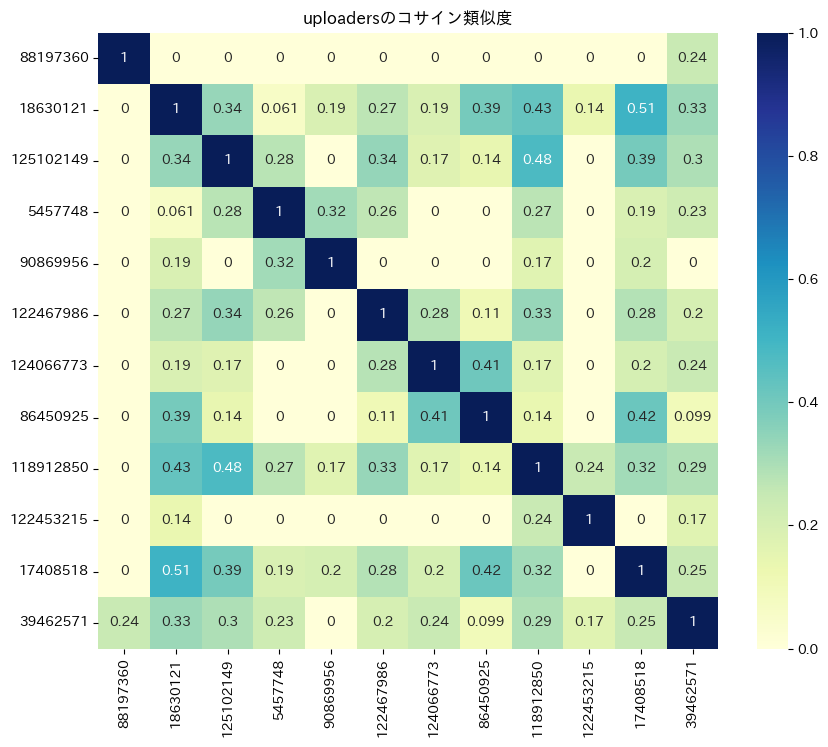

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのコサイン類似度")
plt.show()

In [61]:
tfidf_cosine_sim_uploaders = calculate_tfidf_cosine_similarity(connection_matrix.T)
print("uploadersのtf-idfコサイン類似度:")
tfidf_cosine_sim_uploaders

uploadersのtf-idfコサイン類似度:


88197360  18630121  125102149   5457748  90869956  122467986  \
88197360   1.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
18630121   0.000000  1.000000   0.294207  0.039306  0.154009   0.213150   
125102149  0.000000  0.294207   1.000000  0.256371  0.000000   0.285022   
5457748    0.000000  0.039306   0.256371  1.000000  0.255222   0.233158   
90869956   0.000000  0.154009   0.000000  0.255222  1.000000   0.000000   
122467986  0.000000  0.213150   0.285022  0.233158  0.000000   1.000000   
124066773  0.000000  0.118792   0.103813  0.000000  0.000000   0.175320   
86450925   0.000000  0.339439   0.084741  0.000000  0.000000   0.047011   
118912850  0.000000  0.374144   0.456952  0.236731  0.133386   0.273580   
122453215  0.000000  0.105522   0.000000  0.000000  0.000000   0.000000   
17408518   0.000000  0.453761   0.336224  0.147276  0.164420   0.192631   
39462571   0.268246  0.261819   0.247452  0.243836  0.000000   0.128800   

           124066773  86450925  118912850  122453215  17408518  39462571  
88197360    0.000000  0.000000   0.000000   0.000000  0.000000  0.268246  
18630121    0.118792  0.339439   0.374144   0.105522  0.453761  0.261819  
125102149   0.103813  0.084741   0.456952   0.000000  0.336224  0.247452  
5457748     0.000000  0.000000   0.236731   0.000000  0.147276  0.243836  
90869956    0.000000  0.000000   0.133386   0.000000  0.164420  0.000000  
122467986   0.175320  0.047011   0.273580   0.000000  0.192631  0.128800  
124066773   1.000000  0.268145   0.102886   0.000000  0.126823  0.148758  
86450925    0.268145  1.000000   0.097589   0.000000  0.386677  0.039889  
118912850   0.102886  0.097589   1.000000   0.236768  0.252941  0.245240  
122453215   0.000000  0.000000   0.236768   1.000000  0.000000  0.132140  
17408518    0.126823  0.386677   0.252941   0.000000  1.000000  0.193082  
39462571    0.148758  0.039889   0.245240   0.132140  0.193082  1.000000

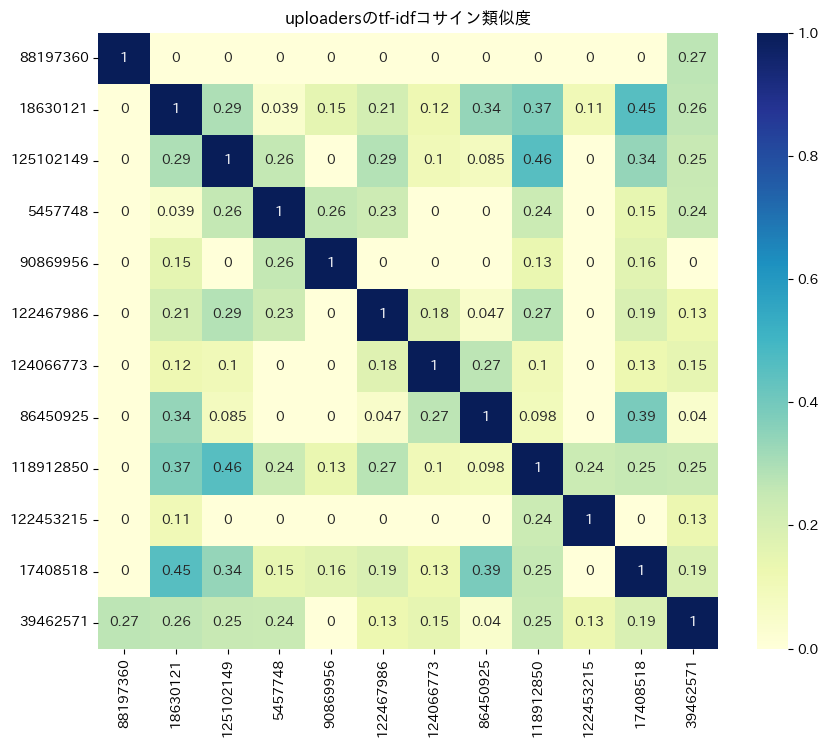

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_cosine_sim_uploaders, annot=True, cmap='YlGnBu')
plt.title("uploadersのtf-idfコサイン類似度")
plt.show()

In [63]:
cosine_sim_users = calculate_cosine_similarity(connection_matrix)
print("user_idsのコサイン類似度:")
cosine_sim_users

user_idsのコサイン類似度:


G0-uvGwLnJQy54MbiIMtiekZOzY  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     1.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.353553   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             VvzO3h4s0KVjcamN95KJCQkL3sE  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     1.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.353553   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     1.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             U4htUNHf9gzdvXJnVYNLJnIjhSU  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.408248   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.408248   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     1.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.816497   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.408248   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.577350   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.408248   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.408248   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             b9MFx88IKmMyOyBrtU5rH8OtvuI  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.500000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.500000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.816497   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     1.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.707107   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.500000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             lyAw5ppedOeFXmVXt9rWOYidPkM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.500000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.408248   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.500000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     1.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.707107   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.500000   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.500000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.408248   

                             yD-P5wYxfgDJZs45eIPi7chcegM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.500000   
...                                                  ...   
6WVs

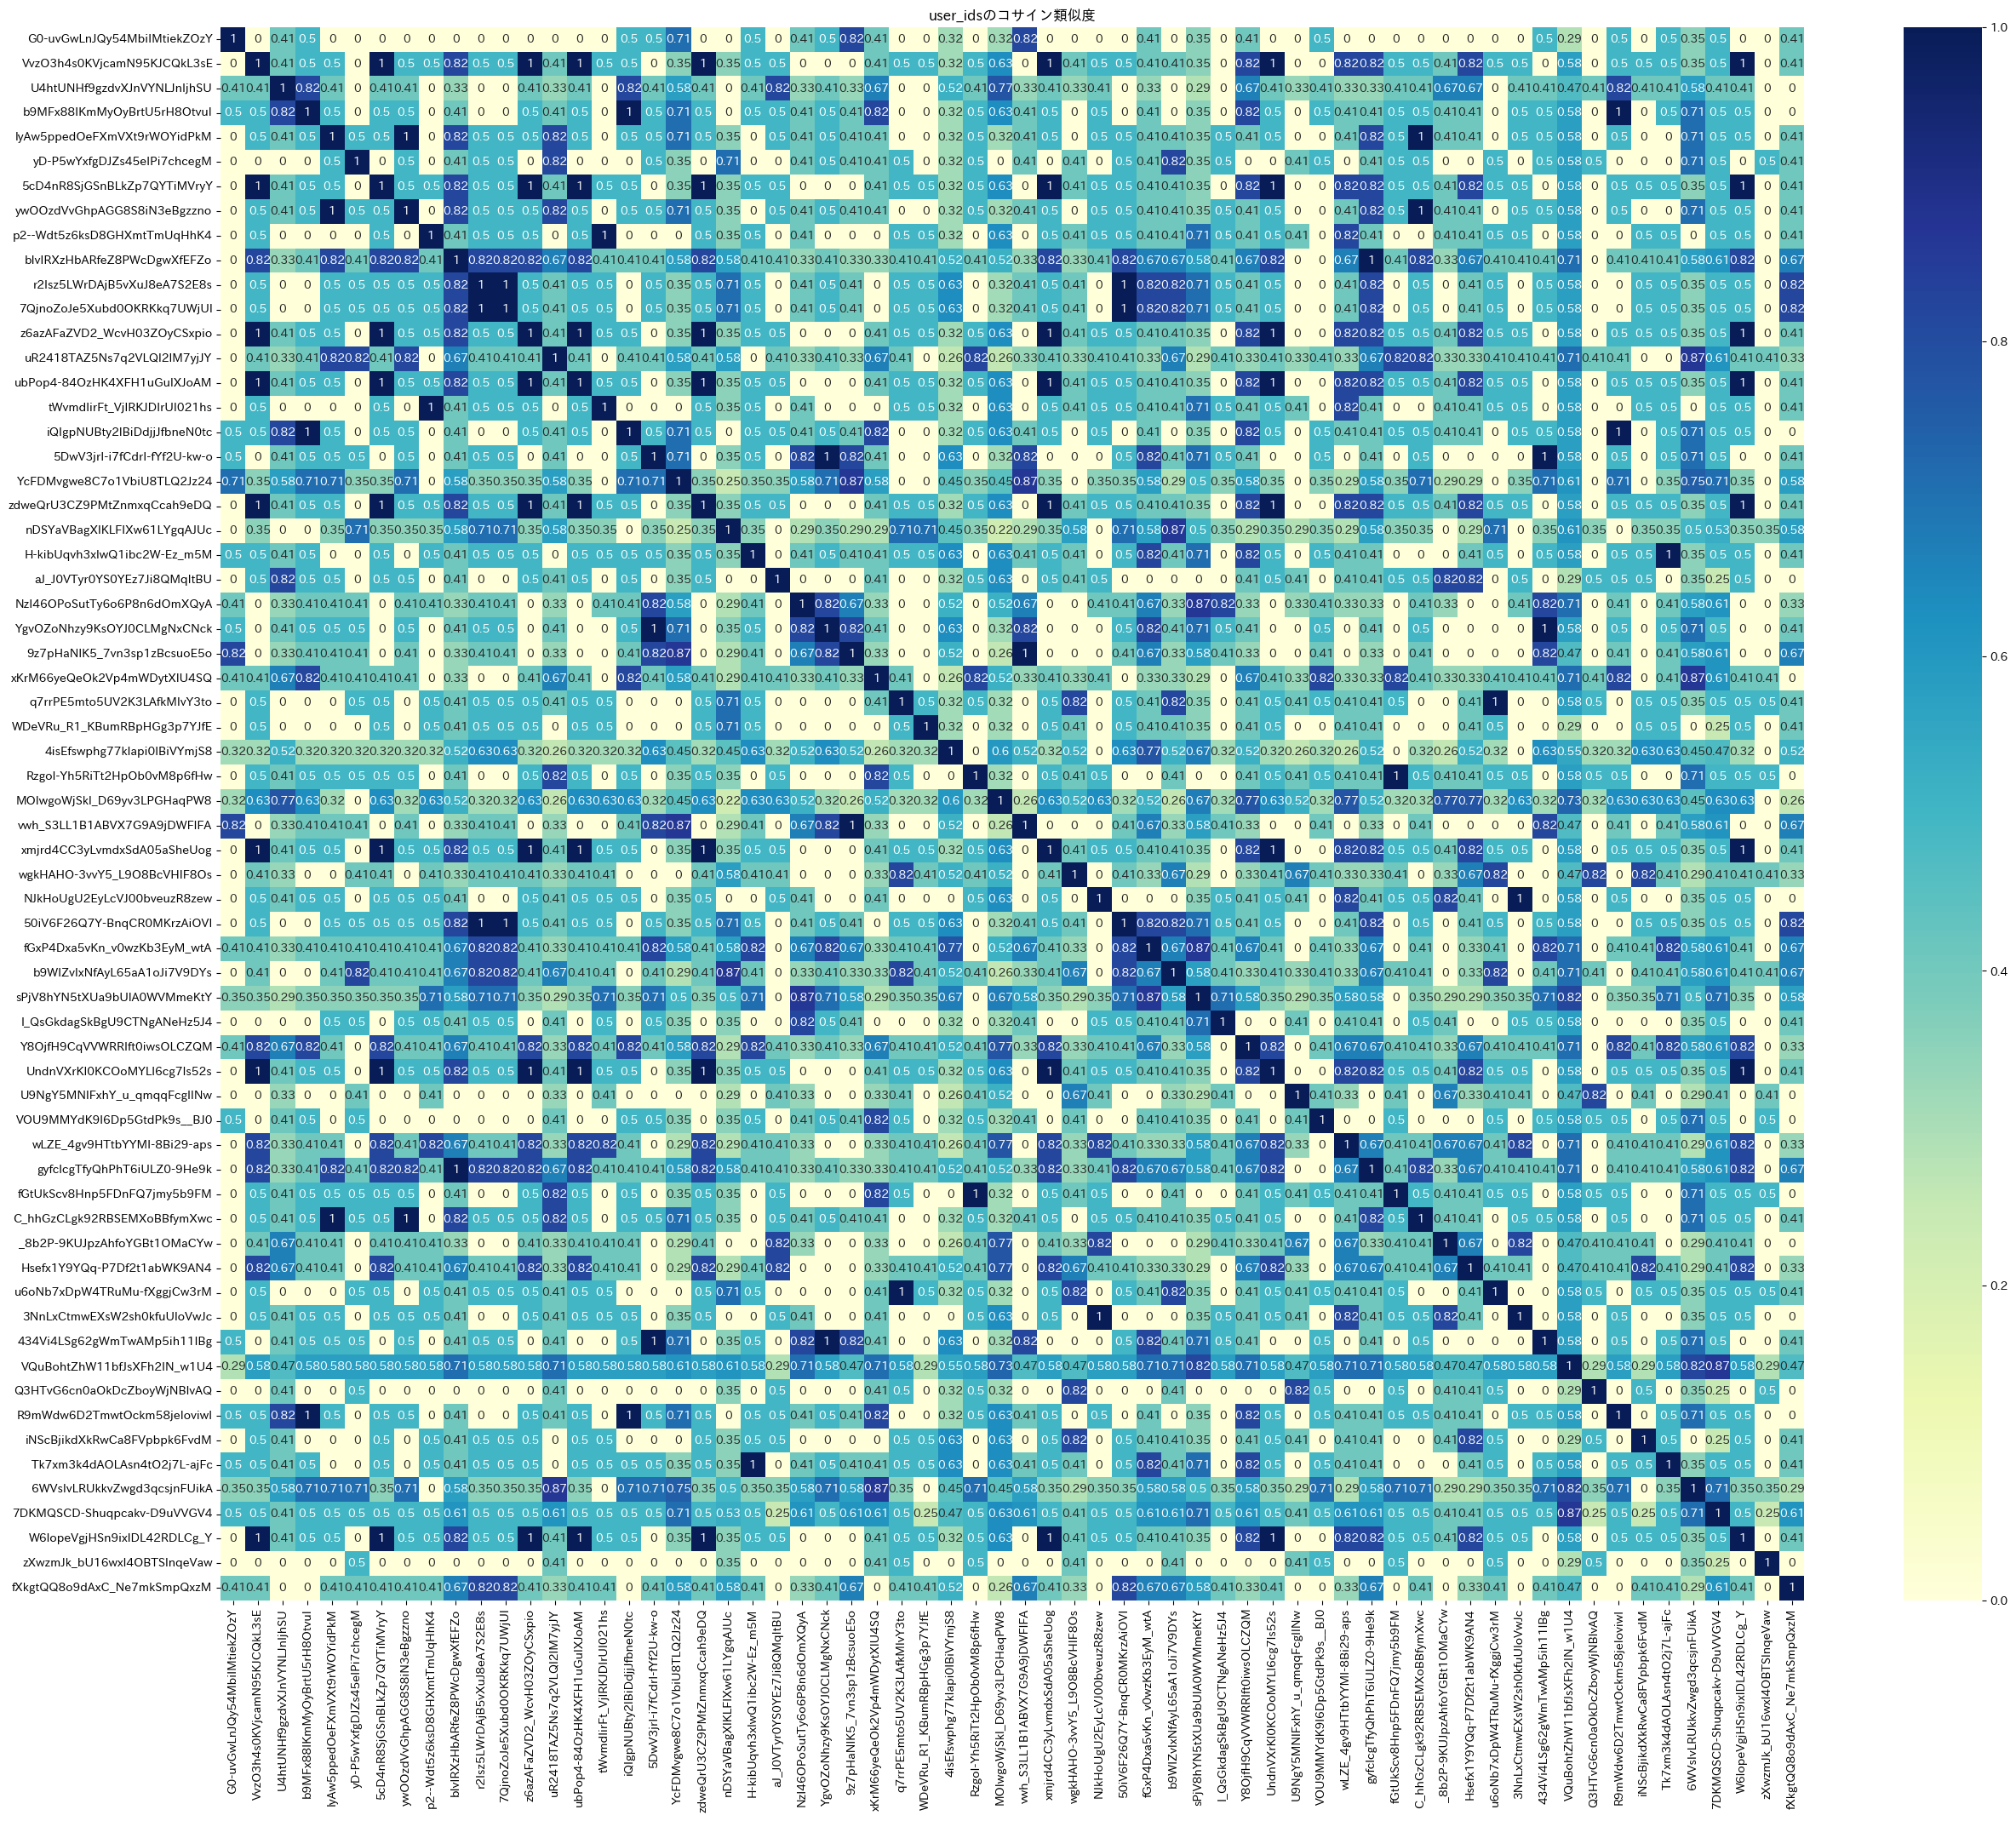

In [64]:
plt.figure(figsize=(30, 24))
sns.heatmap(cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのコサイン類似度")
plt.show()

In [65]:
tfidf_cosine_sim_users = calculate_tfidf_cosine_similarity(connection_matrix)
print("user_idsのtf-idfコサイン類似度:")
tfidf_cosine_sim_users

user_idsのtf-idfコサイン類似度:


G0-uvGwLnJQy54MbiIMtiekZOzY  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     1.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.268390   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.396158   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.260283   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.510332   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.681095   

                             VvzO3h4s0KVjcamN95KJCQkL3sE  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     1.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.311442   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.459705   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.475621   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.302035   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.312356   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     1.000000   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.279853   

                             U4htUNHf9gzdvXJnVYNLJnIjhSU  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.268390   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.311442   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     1.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.677483   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.291092   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.445119   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.234249   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.311442   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             b9MFx88IKmMyOyBrtU5rH8OtvuI  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.396158   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.459705   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.677483   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     1.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.429667   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.657019   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.345764   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.459705   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.000000   

                             lyAw5ppedOeFXmVXt9rWOYidPkM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.475621   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.291092   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.429667   
lyAw5ppedOeFXmVXt9rWOYidPkM                     1.000000   
...                                                  ...   
6WVsIvLRUkkvZwgd3qcsjnFUikA                     0.635032   
7DKMQSCD-Shuqpcakv-D9uVVGV4                     0.334193   
W6lopeVgjHSn9ixlDL42RDLCg_Y                     0.475621   
zXwzmJk_bU16wxl4OBTSlnqeVaw                     0.000000   
fXkgtQQ8o9dAxC_Ne7mkSmpQxzM                     0.338636   

                             yD-P5wYxfgDJZs45eIPi7chcegM  \
G0-uvGwLnJQy54MbiIMtiekZOzY                     0.000000   
VvzO3h4s0KVjcamN95KJCQkL3sE                     0.000000   
U4htUNHf9gzdvXJnVYNLJnIjhSU                     0.000000   
b9MFx88IKmMyOyBrtU5rH8OtvuI                     0.000000   
lyAw5ppedOeFXmVXt9rWOYidPkM                     0.467894   
...                                                  ...   
6WVs

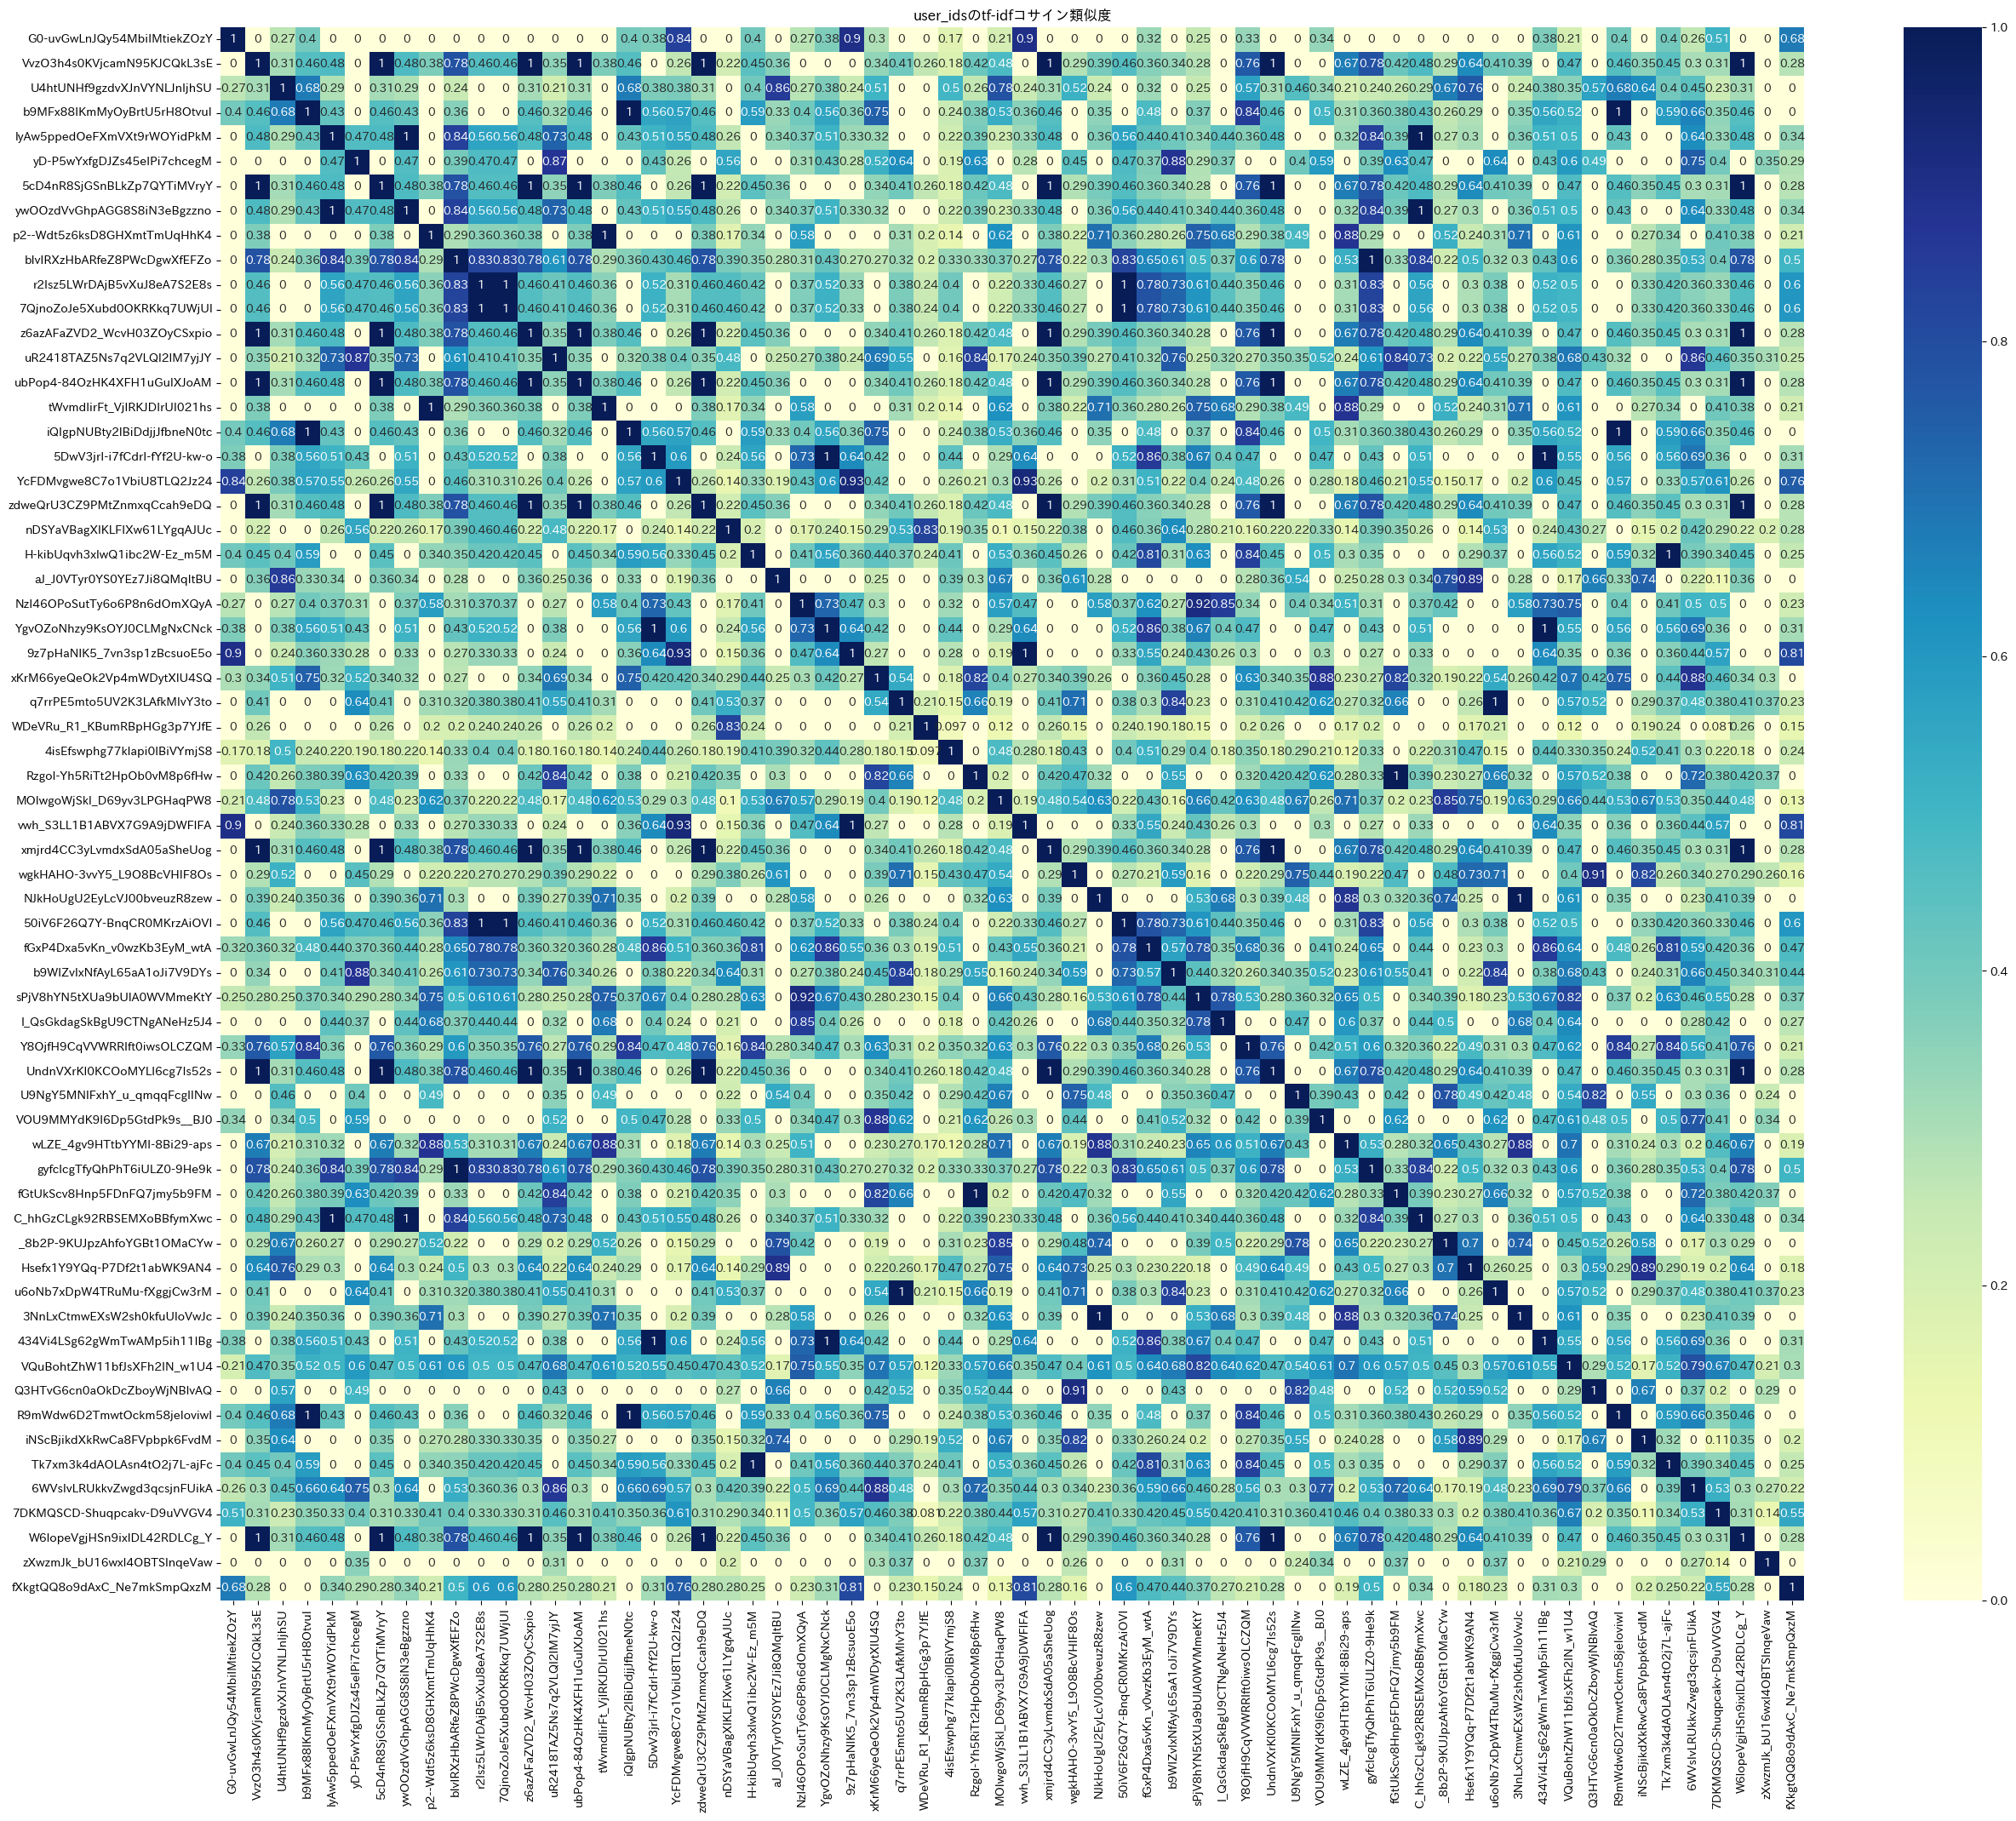

In [66]:
plt.figure(figsize=(30, 24))
sns.heatmap(tfidf_cosine_sim_users, annot=True, cmap='YlGnBu')
plt.title("user_idsのtf-idfコサイン類似度")
plt.show()